In [1]:
from utils.colab import *
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

using Transformer_type: swin_base_patch4_window7_224 as a backbone
===========building transformer===========
Loading pretrained model from ./model/swin_base_market.pth


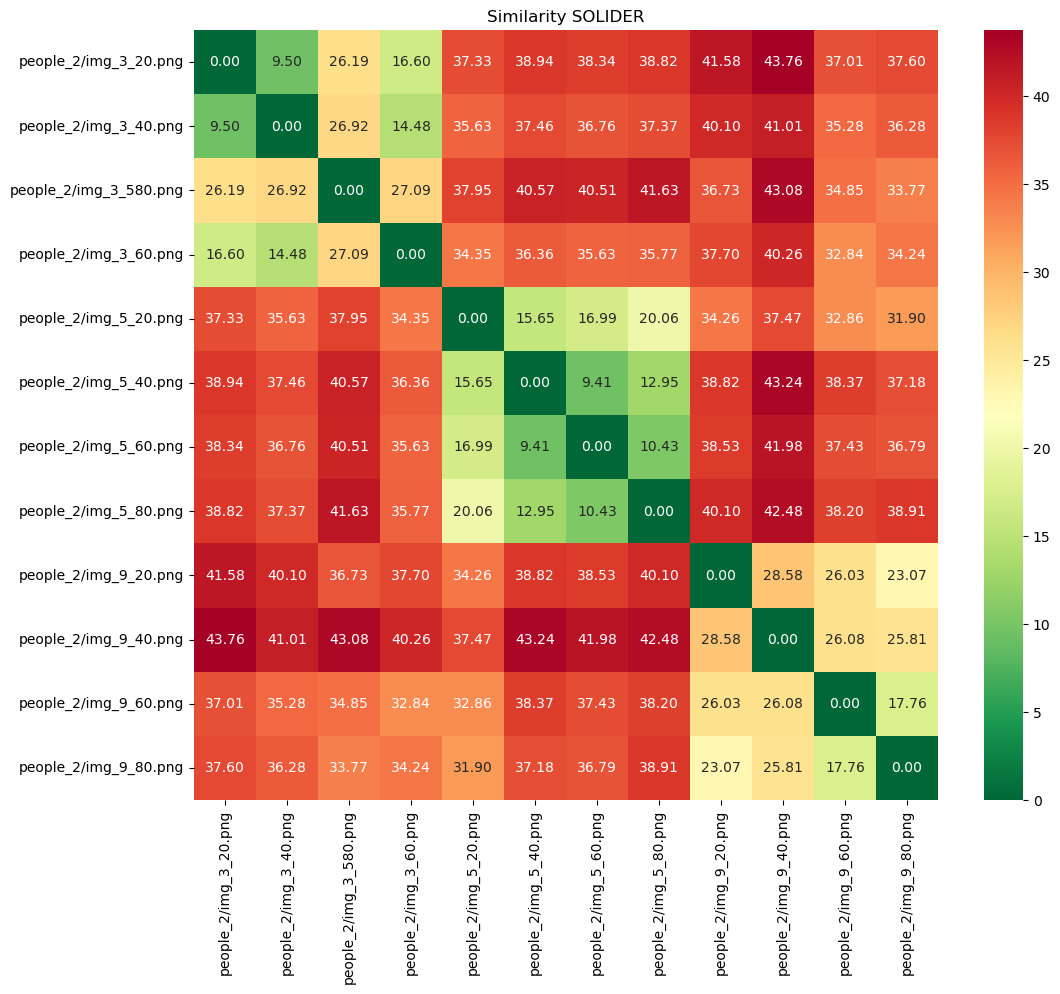

using Transformer_type: vit_base_patch16_224_TransReID as a backbone
using stride: [12, 12], and patch number is num_y21 * num_x10
viewpoint number is : 6
using SIE_Lambda is : 3.0
using drop_out rate is : 0.0
using attn_drop_out rate is : 0.0
using drop_path rate is : 0.1
Resized position embedding from size:torch.Size([1, 197, 768]) to size: torch.Size([1, 211, 768]) with height:21 width: 10
Loading pretrained ImageNet model......from TransReID/model/jx_vit_base_p16_224-80ecf9dd.pth
using shuffle_groups size:2
using shift_num size:5
using divide_length size:4
===========building transformer with JPM module ===========
Loading pretrained model from TransReID/model/vit_transreid_market.pth


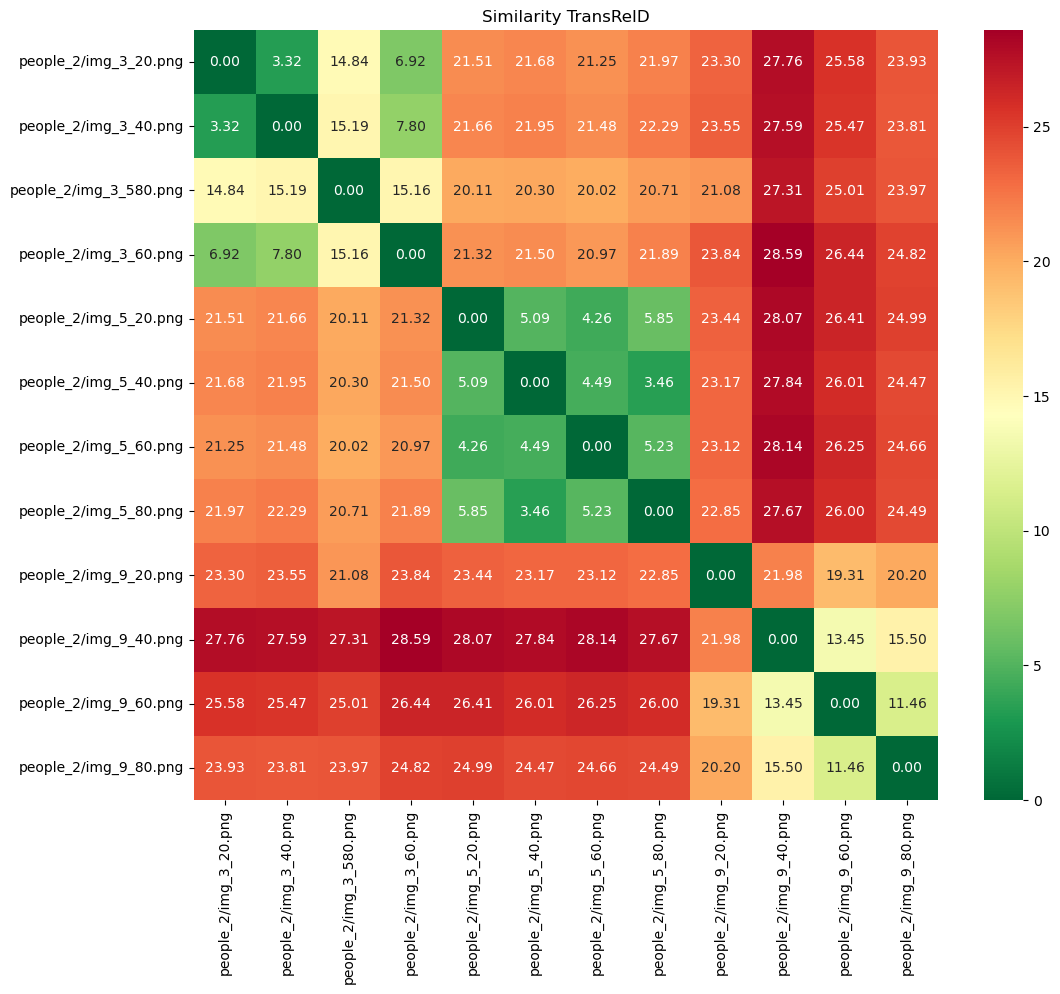

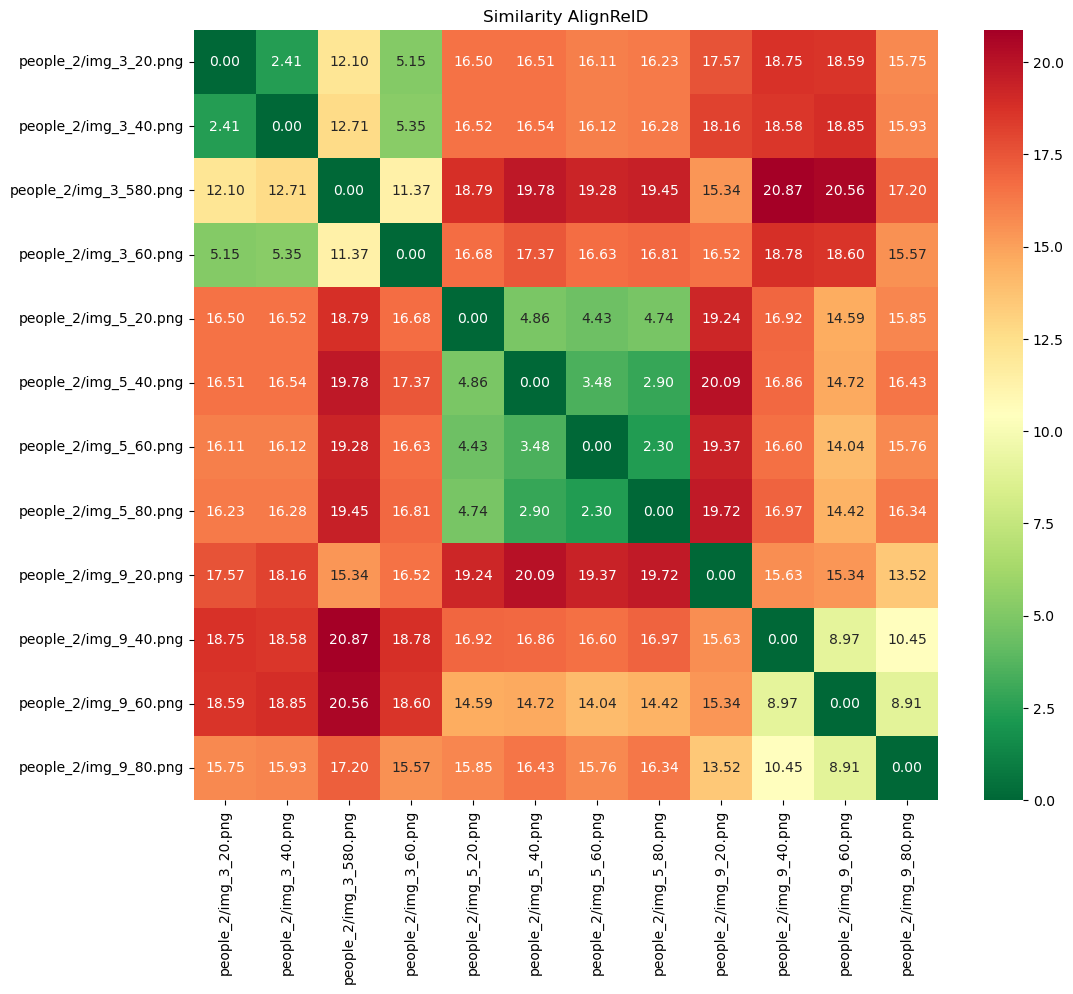

In [2]:
heatmap_solider('people_2',weight='./model/swin_base_market.pth',semantic_weight=0.2)
heatmap_transreid('people_2',pretrain_path="TransReID/model/jx_vit_base_p16_224-80ecf9dd.pth",weight="TransReID/model/vit_transreid_market.pth")
heatmap_alignreid('people_2',weight="AlignedReID/Cuhk03_Resnet50_Alignedreid/checkpoint_ep300.pth.tar")

using Transformer_type: swin_base_patch4_window7_224 as a backbone
===========building transformer===========
Loading pretrained model from ./model/swin_base_market.pth
using Transformer_type: vit_base_patch16_224_TransReID as a backbone
using stride: [12, 12], and patch number is num_y21 * num_x10
viewpoint number is : 6
using SIE_Lambda is : 3.0
using drop_out rate is : 0.0
using attn_drop_out rate is : 0.0
using drop_path rate is : 0.1
Resized position embedding from size:torch.Size([1, 197, 768]) to size: torch.Size([1, 211, 768]) with height:21 width: 10
Loading pretrained ImageNet model......from TransReID/model/jx_vit_base_p16_224-80ecf9dd.pth
using shuffle_groups size:2
using shift_num size:5
using divide_length size:4
===========building transformer with JPM module ===========
Loading pretrained model from TransReID/model/vit_transreid_market.pth


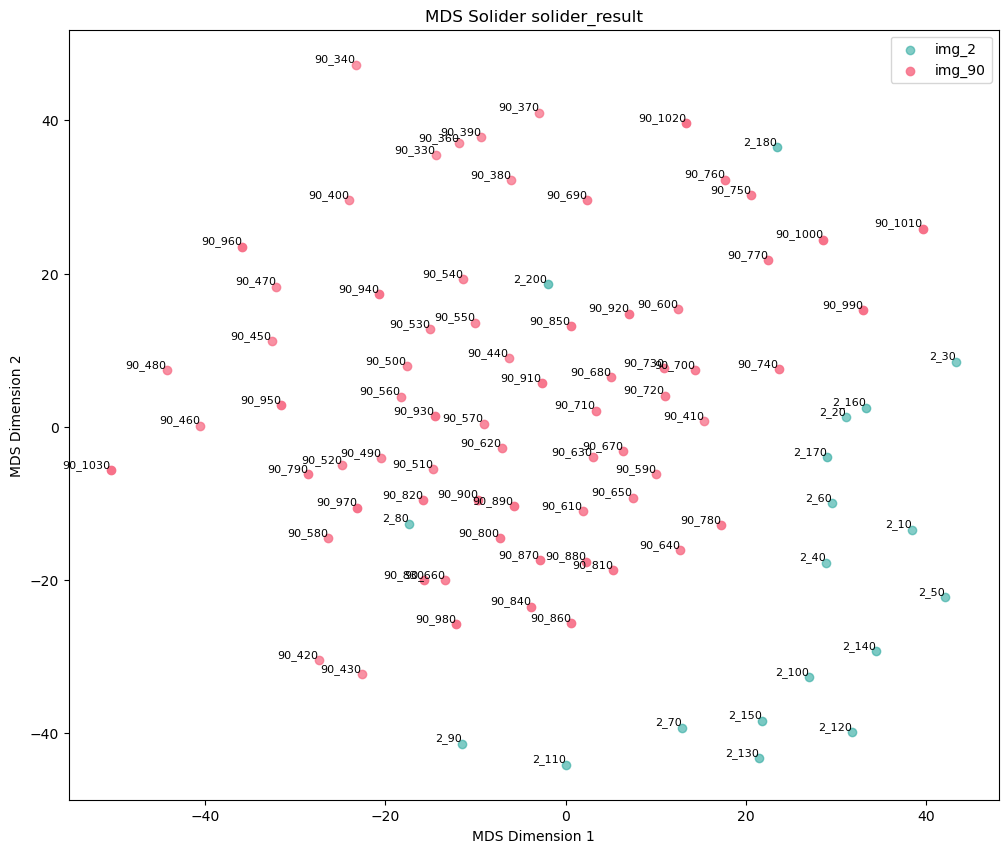

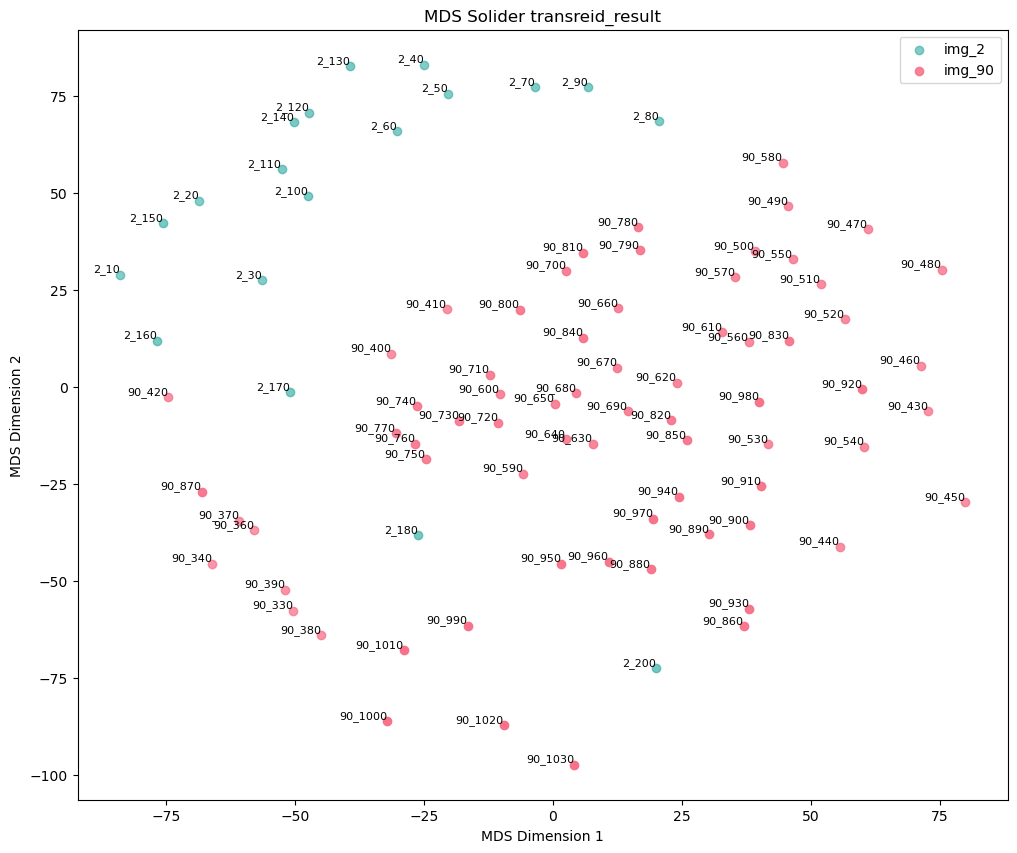

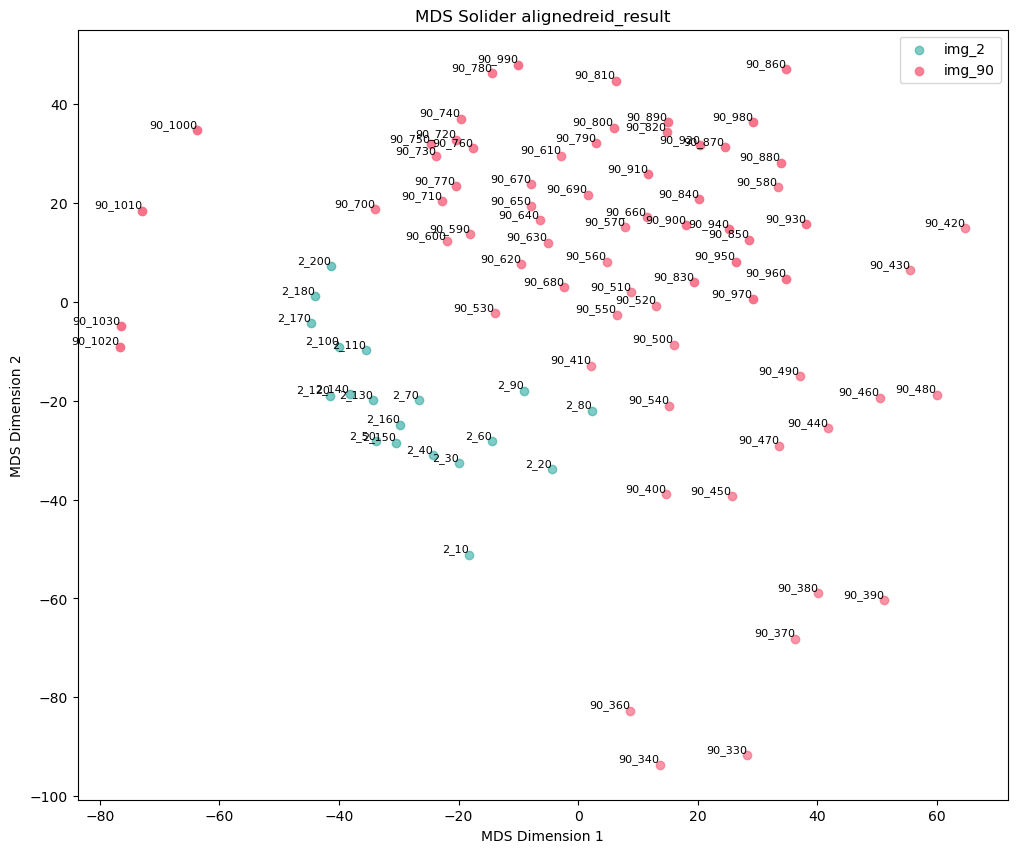

In [2]:
test = [
    # './images_subframev2',
    './images_subframev2/90',
    './images_subframev2/2',
    # './images_subframev2/114',
    # './images_subframev2/90',
    # './images_subframev2/130',
    # './images_subframev2/139',
    # './images_subframev2/89',
    # './images_subframev2/6',
    # './images_subframev2/45',
    # './images_subframev2/108',
    # './images_subframev2/158',
    # './images_subframev2/10',
    # './images_subframev2/44',
    # './images_subframev2/72',
    # './images_subframev2/2',
    # './images_subframev2/90',
    # './images_subframev2/77',
    # './images_subframev2/130',
    # './images_subframev2/2',
    # './images_testsss',
    ]

features , images_names = solider_result(folder_path=test, weight='./model/swin_base_market.pth')
features_2 , images_names_2 = transreid_result(folder_path=test, pretrain_path="TransReID/model/jx_vit_base_p16_224-80ecf9dd.pth",weight="TransReID/model/vit_transreid_market.pth")
features_3 , images_names_3 = alignedreid_result(folder_path=test, weight='./model/swin_base_market.pth')


plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='solider_result',scaler=True)
plot_mds(features_array=features_2, image_names=images_names_2,simpleLegend=True, title='transreid_result',scaler=True)
plot_mds(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='alignedreid_result',scaler=True)




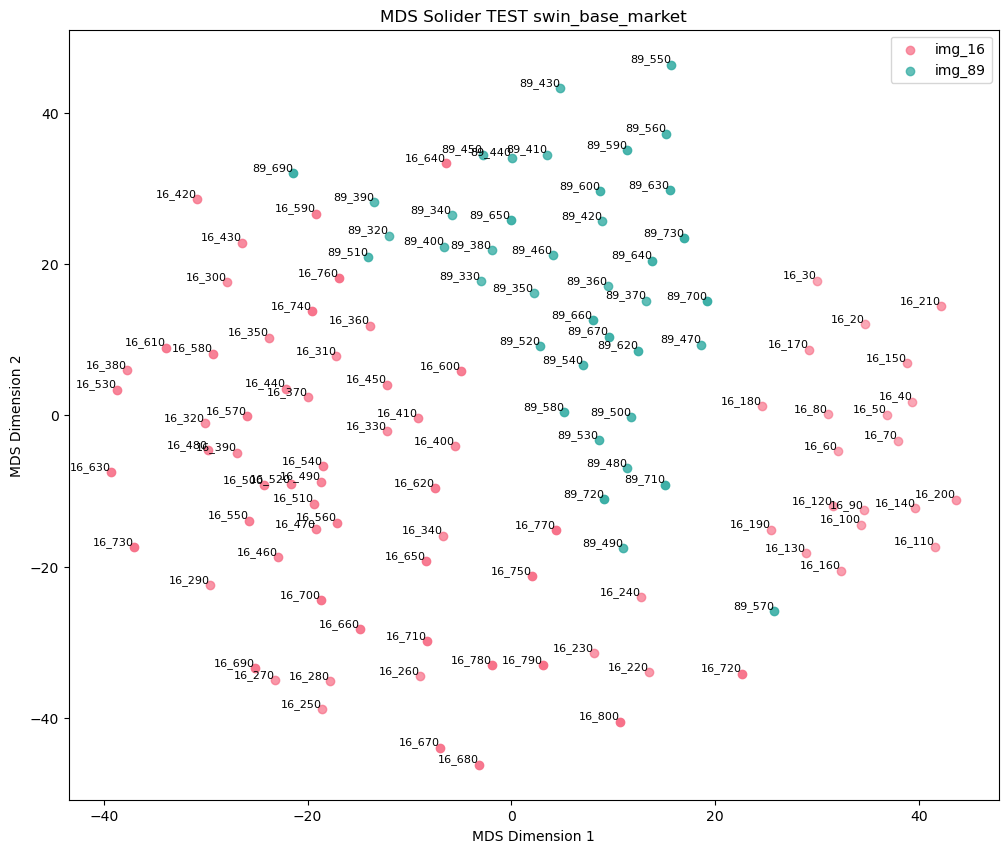

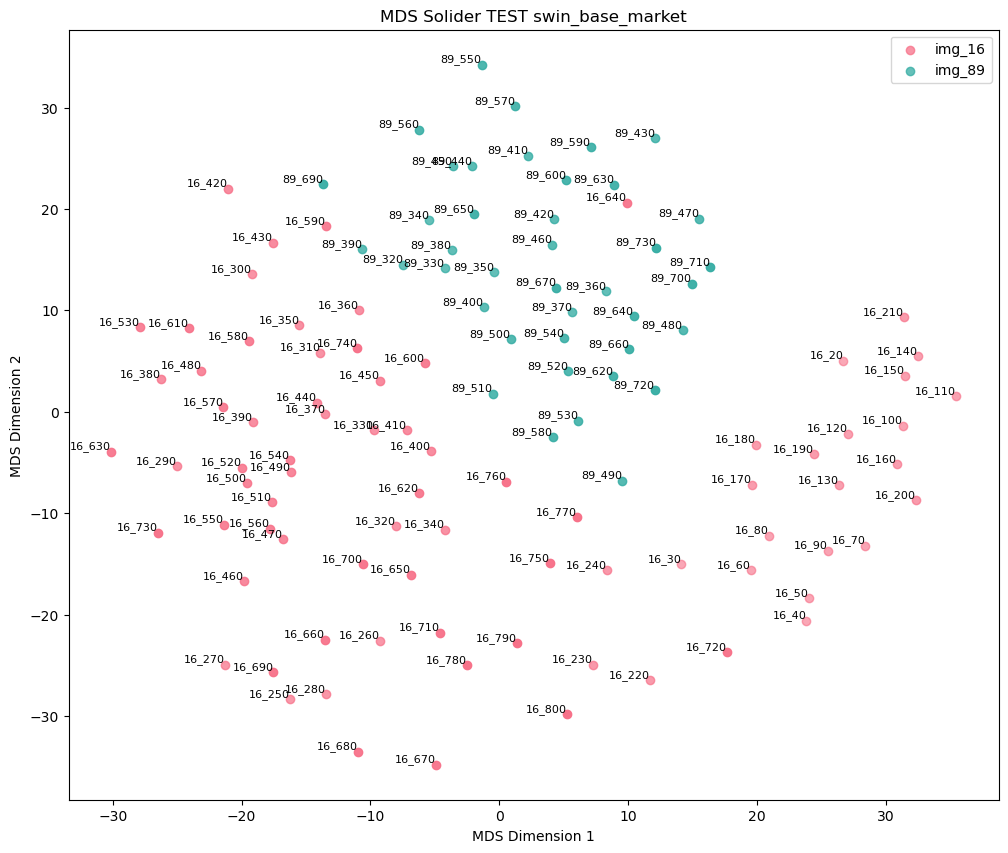

Silhouette Score: 0.40


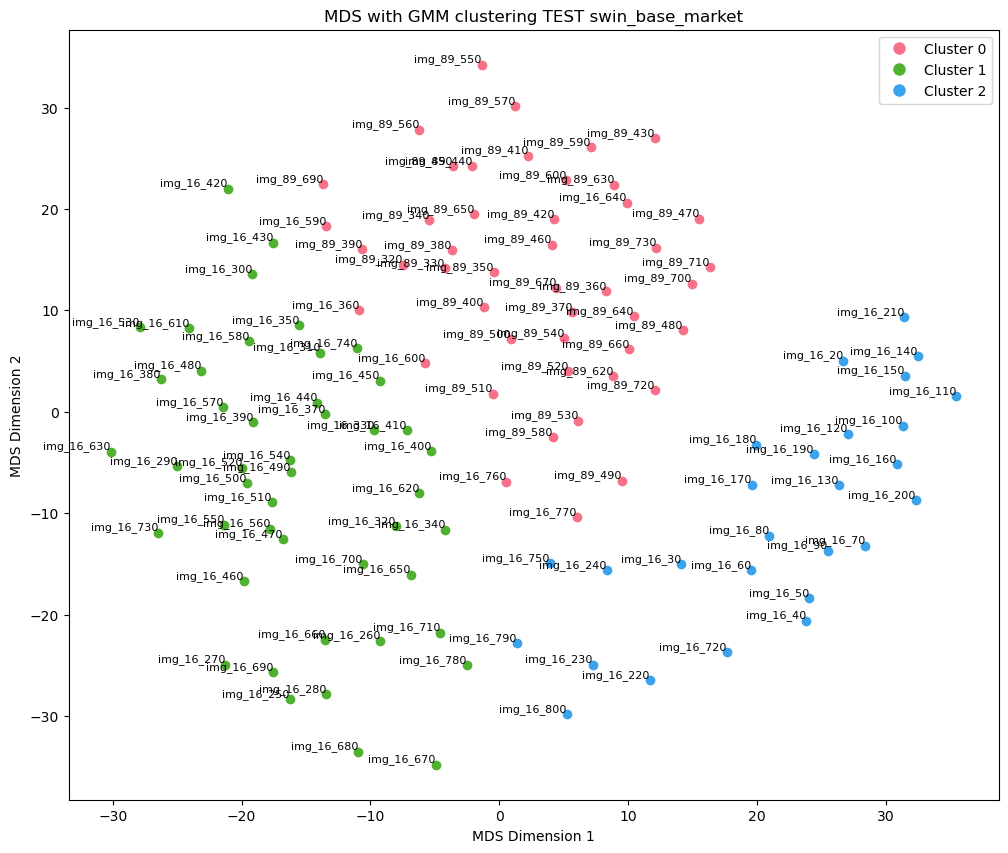

Silhouette Score: 0.41


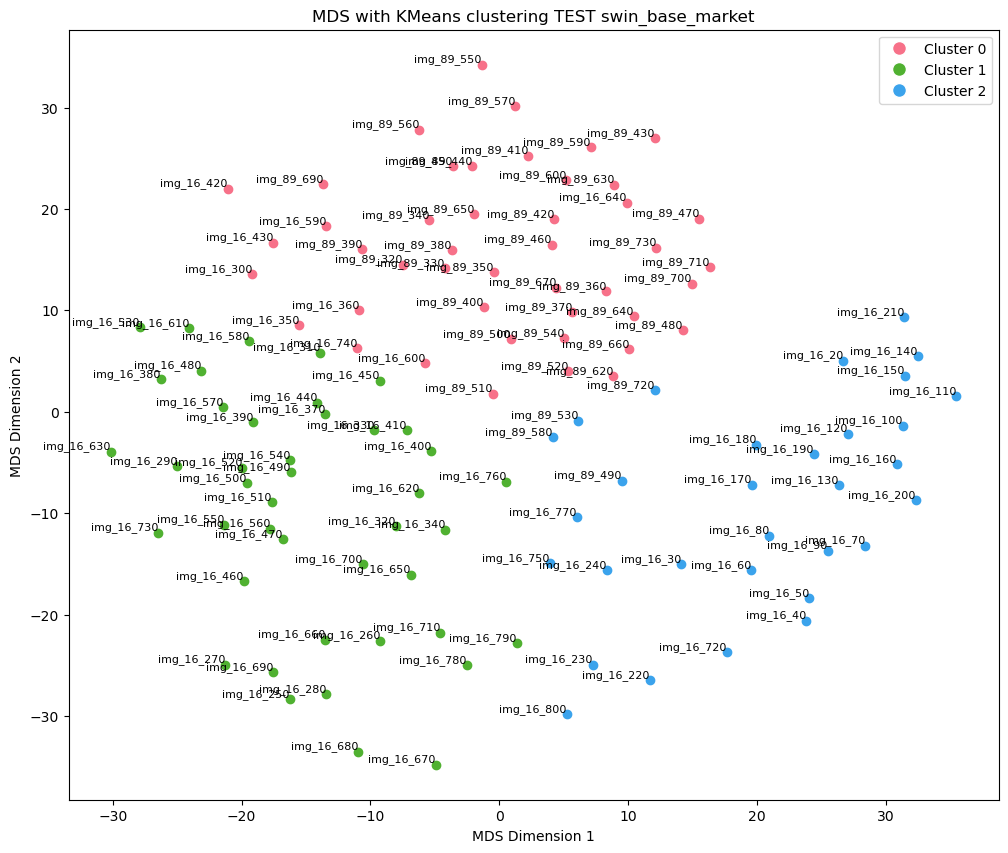

In [7]:
features_from_csv = pd.read_csv('solider.csv').sort_values(by='folder')
A=16
B=89
images_names, features = features_from_csv[(features_from_csv.folder == A) | (features_from_csv.folder == B)].iloc[:, 1].values, features_from_csv[(features_from_csv.folder == A) | (features_from_csv.folder == B)].iloc[:, 2:].values
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',scaler=True)
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',scaler=False)
# plot_mds_dbscan(features_array=features, image_names=images_names,plot=True, title='DB',eps=9,min_samples_ratio=0.15,min_include=3, scaler=False)
plot_mds_gmm(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',scaler=False,n_clusters=3)
plot_mds_kmeans(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',scaler=False,n_clusters=3)

In [ ]:
features_from_csv = pd.read_csv('solider.csv').sort_values(by='folder')
A = 1
B = 90

images_names, features = features_from_csv[(features_from_csv.folder == A) | (features_from_csv.folder == B)].iloc[:, 1].values, features_from_csv[(features_from_csv.folder == A) | (features_from_csv.folder == B)].iloc[:, 2:].values
# scaler = StandardScaler().fit(features)
# features = scaler.transform(features)
plot_mds_dbscan(features_array=features, image_names=images_names,plot=True, title='DB',eps=9,min_samples_ratio=0.15,min_include=3)
# plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market')

In [ ]:
folderA = total_folder_to_traverse[i] 
folderB = total_folder_to_traverse[j]
valuesA = features_from_csv[features_from_csv.folder == folderA]
valuesB = features_from_csv[features_from_csv.folder == folderB]
totalValues = pd.concat([valuesA,valuesB],ignore_index=True)
images_names , features = totalValues.iloc[:, 1], totalValues.iloc[:, 2:].values
match, msg = plot_mds_dbscan(features_array=features, image_names=images_names,simpleLegend=True, title='DB',eps=9,min_samples=14)

In [ ]:
count_folders_items = features_from_csv.groupby('folder').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
filter = count_folders_items[count_folders_items.Count > 10]
total_folder_to_traverse =filter['folder'].values
total_folder_to_traverse[0]

In [ ]:
for i in range(len(total_folder_to_traverse)):
    for j in range(i + 1, len(total_folder_to_traverse)):
        # Perform your calculation or operation here
        result = total_folder_to_traverse[i] * total_folder_to_traverse[j]
        
        print(f"Calculation between {total_folder_to_traverse[i]} and {total_folder_to_traverse[j]}: {result}")

In [ ]:

images_names, features = features_from_csv[features_from_csv.folder == total_folder_to_traverse[0]].iloc[:, 1], features_from_csv[features_from_csv.folder == total_folder_to_traverse[0]].iloc[:, 2:].values

In [ ]:
test = [
        # './images_subframev2/90',
        # './images_subframev2/10',
        # './images_subframev2/44',
        # './images_subframev2/72',
        # './images_subframev2/4',
        './images_subframev2/2',
        './images_subframev2/90',
        # './images_subframev2/2',
        # './images_testsss',
        ]
features , images_names = solider_result(folder_path=test, weight='./model/swin_base_market.pth')

In [ ]:
features_from_csv = pd.read_csv('solider_2_90.csv').sort_values(by='folder')
images_names_csv, features_csv = features_from_csv.iloc[:, 1], features_from_csv.iloc[:, 2:].values

In [ ]:
plot_svd(features_array=features, image_names=images_names,simpleLegend=True, title='CALC')
plot_svd(features_array=features_csv, image_names=images_names_csv,simpleLegend=True, title='EXCEL')

In [ ]:
test = [
        # './images_subframev2/90',
        # './images_subframev2/10',
        # './images_subframev2/44',
        # './images_subframev2/72',
        # './images_subframev2/4',
        # './images_subframev2/77',
        # './images_subframev2/130',
        './images_subframev2/1',
        './images_subframev2/2',
        # './images_testsss',
        ]
features_2 , images_names_2 = solider_result(folder_path=test, weight='./model/swin_base_market.pth')

In [ ]:
test = [
        './images_subframev2/90',
        # './images_subframev2/10',
        # './images_subframev2/44',
        # './images_subframev2/72',
        # './images_subframev2/4',
        # './images_subframev2/77',
        # './images_subframev2/130',
        # './images_subframev2/1',
        './images_subframev2/2',
        # './images_testsss',
        ]
features_3 , images_names_3 = solider_result(folder_path=test, weight='./model/swin_base_market.pth')

In [ ]:
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)
plot_mds_dbscan(features_array=features_3, image_names=images_names_3,simpleLegend=True, title='TEST swin_base_market',eps=9,min_samples=14)


In [ ]:
plot_mds(features_array=features_2, image_names=images_names_2,simpleLegend=True, title='TEST swin_base_market')

In [ ]:
plot_mds(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market')
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=5)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=10)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=15)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=20)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=25)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=30)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=35)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=40)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=45)
plot_tsne(features_array=features, image_names=images_names,simpleLegend=True, title='TEST swin_base_market',perplexity=50)